#EDA - 1 Projects

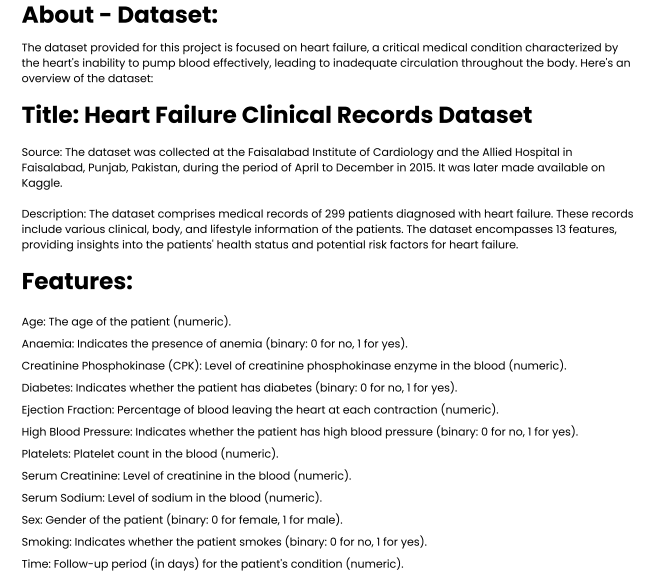

In [3]:
from google.colab import files

uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


1. What is the distribution of age among heart failure patients in the dataset?

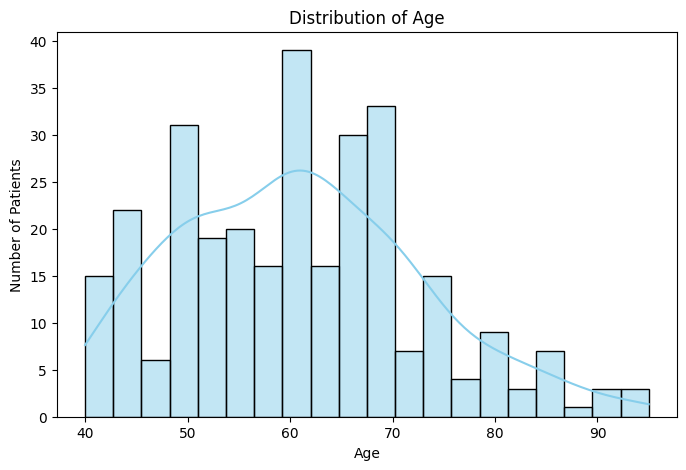

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


2. How does the death rate vary with age?


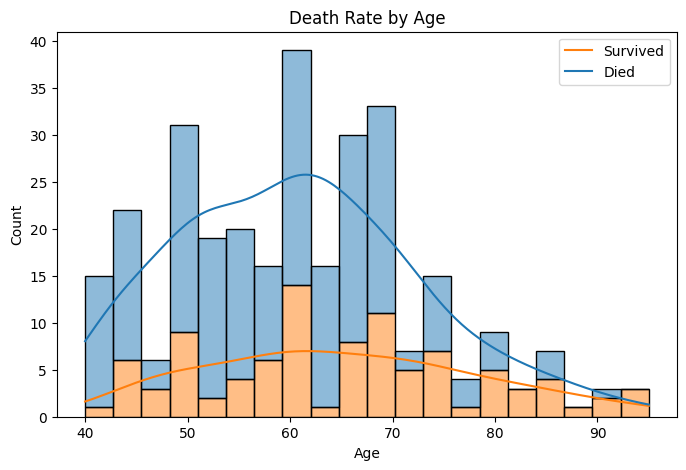

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=20, kde=True, multiple="stack")
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Survived', 'Died'])
plt.show()


3. What is the percentage of male and female patients in the dataset?

In [7]:
sex_counts = df['sex'].value_counts(normalize=True) * 100
print(f"Male: {sex_counts[1]:.2f}%")
print(f"Female: {sex_counts[0]:.2f}%")


Male: 64.88%
Female: 35.12%


4. How does the platelet count vary among different age groups<


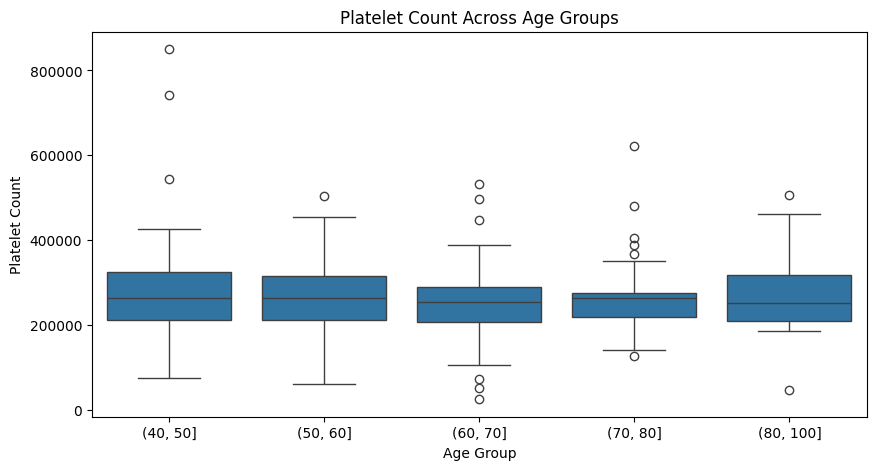

In [8]:
df['age_group'] = pd.cut(df['age'], bins=[40, 50, 60, 70, 80, 100])
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='age_group', y='platelets')
plt.title('Platelet Count Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()


5. Is there a correlation between creatinine and sodium levels in the blood

Correlation between serum creatinine and serum sodium: -0.19


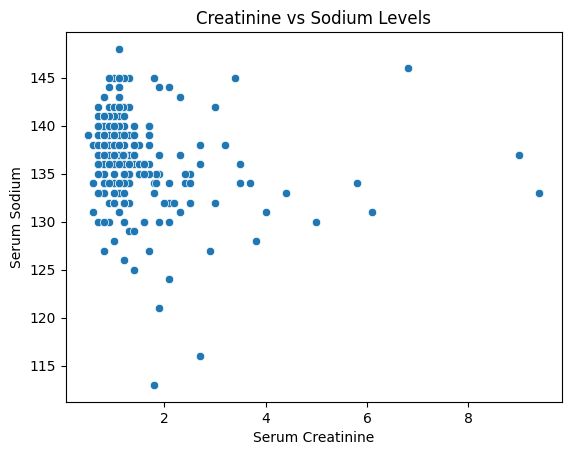

In [9]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print(f"Correlation between serum creatinine and serum sodium: {correlation:.2f}")

sns.scatterplot(data=df, x='serum_creatinine', y='serum_sodium')
plt.title('Creatinine vs Sodium Levels')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.show()


6. How does the prevalence of high blood pressure differ between male and female patients

           No HBP    High BP
Female  58.095238  41.904762
Male    68.556701  31.443299


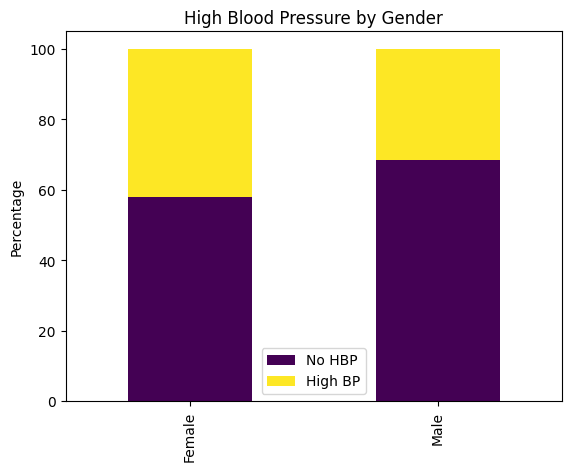

In [10]:
bp_by_sex = pd.crosstab(df['sex'], df['high_blood_pressure'], normalize='index') * 100
bp_by_sex.columns = ['No HBP', 'High BP']
bp_by_sex.index = ['Female', 'Male']
print(bp_by_sex)

bp_by_sex.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('High Blood Pressure by Gender')
plt.ylabel('Percentage')
plt.show()


7. What is the relationship between smoking habits and the occurrence of heart failure

             Survived       Died
Non-Smoker  67.487685  32.512315
Smoker      68.750000  31.250000


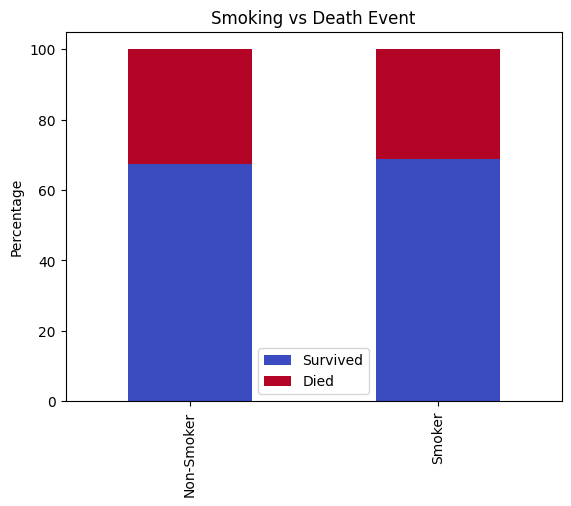

In [11]:
smoking_impact = pd.crosstab(df['smoking'], df['DEATH_EVENT'], normalize='index') * 100
smoking_impact.columns = ['Survived', 'Died']
smoking_impact.index = ['Non-Smoker', 'Smoker']
print(smoking_impact)

smoking_impact.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Smoking vs Death Event')
plt.ylabel('Percentage')
plt.show()


8. Are there any noticeable patterns in the distribution of death events across different age groups

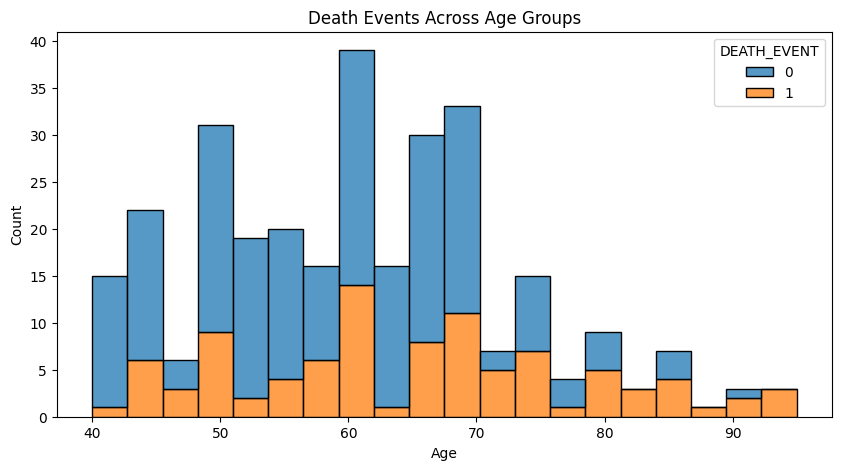

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack', bins=20)
plt.title('Death Events Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


9. Is there any significant difference in ejection fraction between patients with and without diabetes

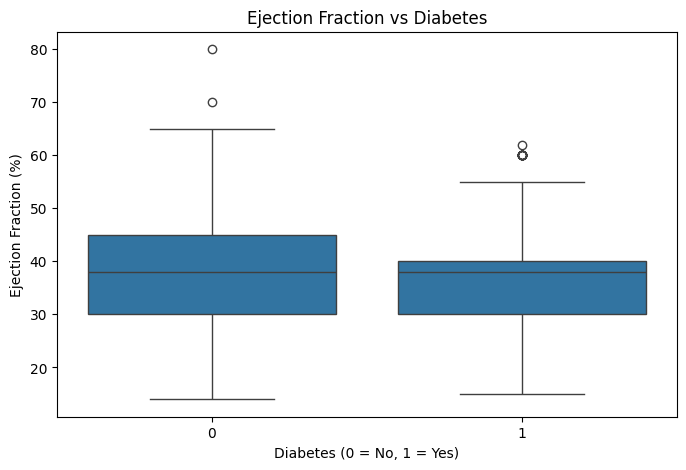

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='diabetes', y='ejection_fraction')
plt.title('Ejection Fraction vs Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction (%)')
plt.show()


10. How does the serum creatinine level vary between patients who survived and those who did not?

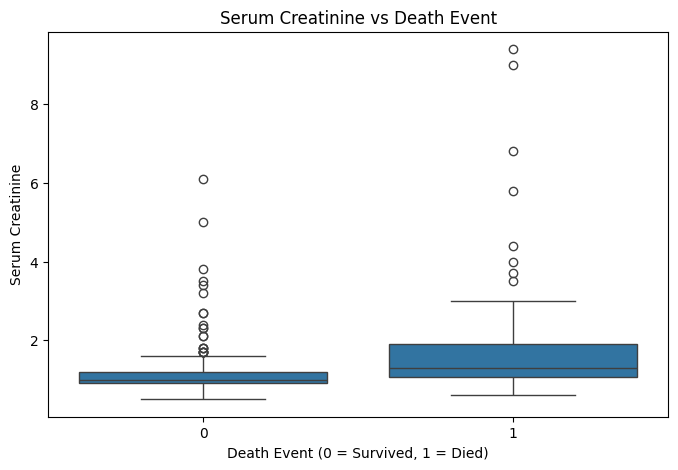

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')
plt.title('Serum Creatinine vs Death Event')
plt.xlabel('Death Event (0 = Survived, 1 = Died)')
plt.ylabel('Serum Creatinine')
plt.show()
